**Business Problem:**

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected.

Goal is to create a classification model that predict (given two dosage measurements) if they mouse will still be infected with the virus.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


#**Data Understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [4]:
df.shape

(400, 3)

In [5]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [6]:
df.size

1200

In [7]:
df.dtypes

,0
Med_1_mL,float64
Med_2_mL,float64
Virus Present,int64


In [8]:
df['Virus Present'].value_counts()

,count
Virus Present,
0,200
1,200


In [9]:
df.Med_1_mL.skew()

np.float64(-0.011421973953190495)

In [10]:
df.Med_2_mL.skew()

np.float64(0.004315085455234912)

In [11]:
df.isnull().sum()

,0
Med_1_mL,0
Med_2_mL,0
Virus Present,0


#**Exploratory Data Analysis**

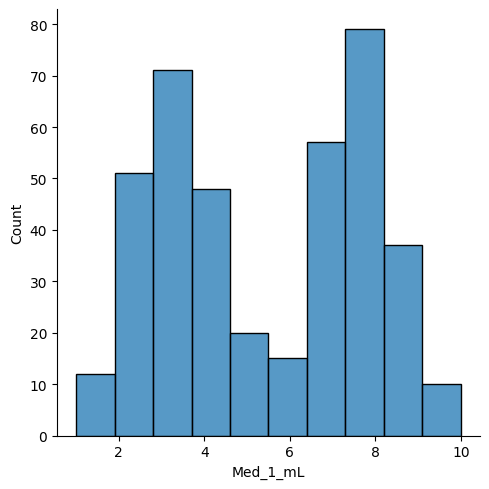

In [12]:
sns.displot(x='Med_1_mL',data=df)

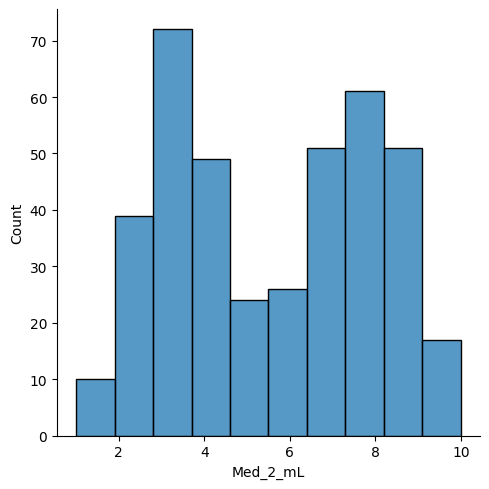

In [13]:
sns.displot(x='Med_2_mL',data=df)

<Axes: xlabel='Virus Present', ylabel='count'>

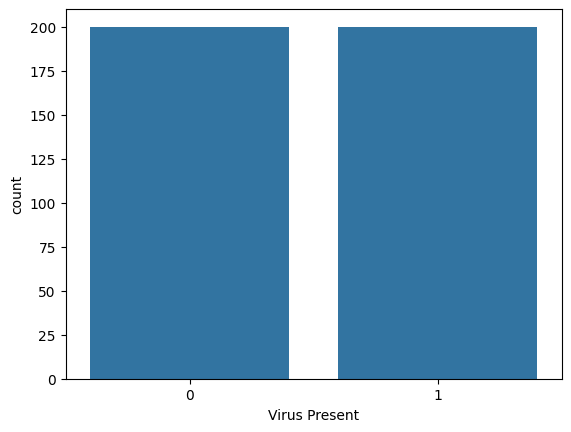

In [14]:
sns.countplot(data=df, x='Virus Present')

<Axes: xlabel='Med_1_mL'>

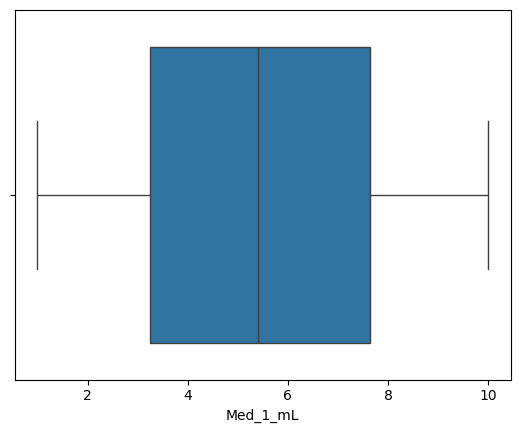

In [15]:
sns.boxplot(data=df, x='Med_1_mL')

<Axes: xlabel='Med_2_mL'>

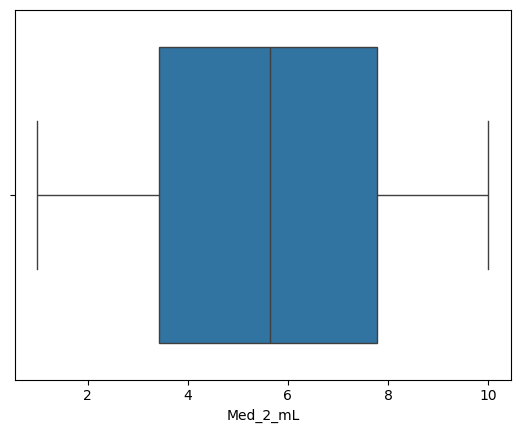

In [16]:
sns.boxplot(data=df, x='Med_2_mL')

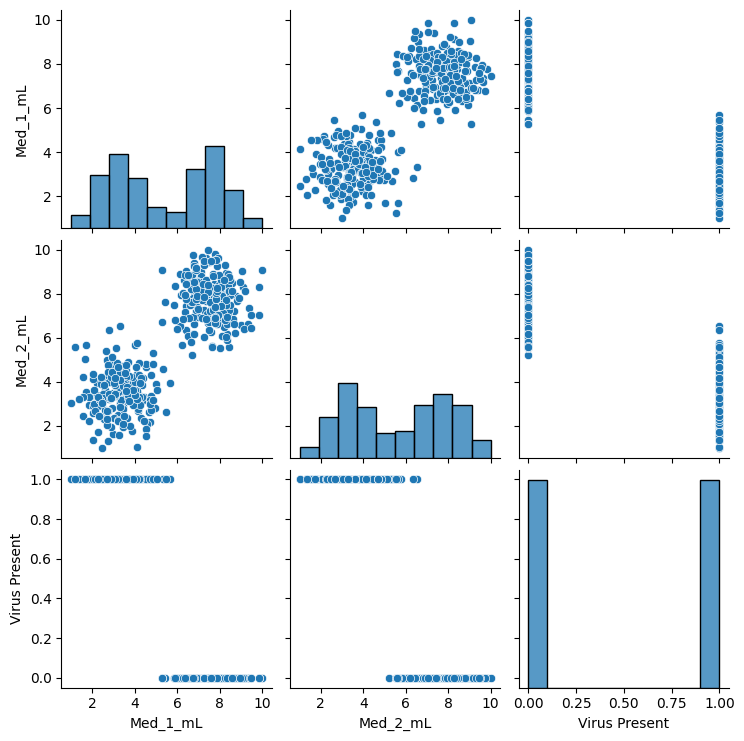

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,Med_1_mL,Med_2_mL,Virus Present
Med_1_mL,1.000000,0.828090,-0.922304
Med_2_mL,0.828090,1.000000,-0.903718
Virus Present,-0.922304,-0.903718,1.000000


<Axes: >

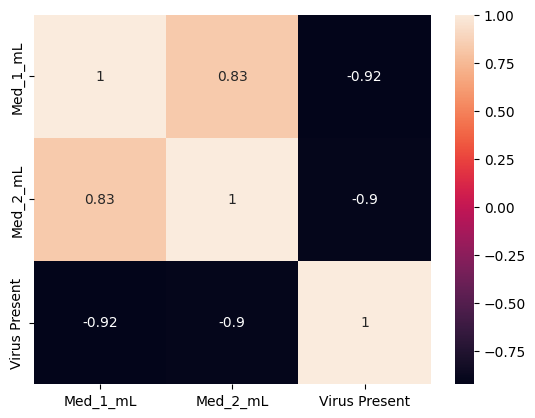

In [19]:
sns.heatmap(df.corr(), annot=True)

#**X & y**

In [20]:
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']

#**Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,test_size=0.3)

#**Modeling**

In [22]:
from sklearn.svm import SVC

In [23]:
# model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)


# evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train, ypred_train))
print("Test Accuracy: ",accuracy_score(y_test, ypred_test))

# cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm_model, X, y, cv=5)
score
print("CV Score:", score.mean())


Train Accuracy:  1.0
Test Accuracy:  1.0
CV Score: 1.0


#**Hyperparameter Tuning**

In [26]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()
param_grid = {'C':[0.01, .1, .2, .3, .4, .5], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

hp = GridSearchCV(estimator, param_grid, cv=5)
hp.fit(X, y)
hp.best_params_

{'C': 0.01, 'kernel': 'linear'}

# **Rebuilt the model**

In [28]:
# model
svm_model = SVC(C= 0.01, kernel= 'linear')
svm_model.fit(X_train, y_train)

# prediction
ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)


# evaluation
from sklearn.metrics import accuracy_score
print("Train Accuracy: ",accuracy_score(y_train, ypred_train))
print("Test Accuracy: ",accuracy_score(y_test, ypred_test))

# cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm_model, X, y, cv=5)
score
print("CV Score:", score.mean())


Train Accuracy:  1.0
Test Accuracy:  1.0
CV Score: 1.0


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



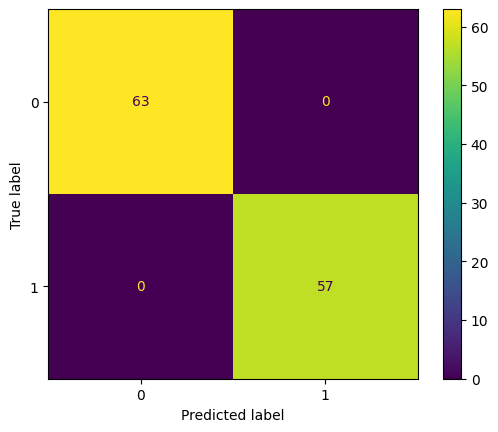

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = svm_model.predict(X_test)
cm = confusion_matrix(ypred_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()